In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cap-4611-spring-21-assignment-1/sample_submission.csv
/kaggle/input/cap-4611-spring-21-assignment-1/train.csv
/kaggle/input/cap-4611-spring-21-assignment-1/test.csv


In [2]:
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
D = pd.read_csv('/kaggle/input/cap-4611-spring-21-assignment-1/train.csv').drop(columns=['id'])
T = pd.read_csv('/kaggle/input/cap-4611-spring-21-assignment-1/test.csv').drop(columns=['id'])
T

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,0.425876,0.472634,0.475828,0.598856,0.598856,0.998655,0.796918,0.808930,0.303358,0.781156,...,0.765001,0.000516,0.623654,0.598854,0.837738,0.278789,0.026699,0.564679,1,0.033798
1,0.483352,0.548572,0.532255,0.610567,0.610567,0.998993,0.797417,0.809332,0.303522,0.781589,...,0.803544,0.000792,0.623814,0.610568,0.840849,0.283411,0.027070,0.566210,1,0.021320
2,0.557403,0.589294,0.606403,0.628454,0.628454,0.999338,0.797840,0.809662,0.303540,0.781949,...,0.830134,0.497296,0.624176,0.628453,0.842081,0.276670,0.026791,0.565159,1,0.058915
3,0.508214,0.553205,0.557578,0.609305,0.609305,0.999059,0.797462,0.809391,0.303463,0.781670,...,0.804534,0.001357,0.622863,0.609305,0.840798,0.280778,0.027410,0.567019,1,0.026110
4,0.545069,0.612298,0.598854,0.605817,0.604599,0.999014,0.797742,0.809626,0.304046,0.781916,...,0.834617,0.002530,0.624115,0.605816,0.843064,0.279336,0.026827,0.565322,1,0.031029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,0.477405,0.518044,0.523529,0.596477,0.596477,0.998968,0.797352,0.809271,0.303461,0.781553,...,0.788079,0.002190,0.643695,0.596479,0.839625,0.275663,0.026747,0.564941,1,0.108882
3405,0.512651,0.595399,0.555169,0.611756,0.611503,0.999167,0.797743,0.809585,0.303729,0.781723,...,0.829967,0.004274,0.625118,0.611753,0.842620,0.278993,0.026798,0.565193,1,0.032682
3406,0.512066,0.550262,0.555115,0.619179,0.619179,0.999109,0.797513,0.809400,0.303446,0.781666,...,0.806412,0.000823,0.624017,0.619179,0.840725,0.277496,0.026883,0.565563,1,0.044620
3407,0.517330,0.563181,0.571551,0.612383,0.612383,0.999092,0.797488,0.809396,0.303439,0.781660,...,0.808670,0.000586,0.622949,0.612380,0.841156,0.280707,0.027276,0.566744,1,0.026297


In [3]:

D.drop(columns=[' research and development expense rate',' interest-bearing debt interest rate',' tax rate (A)','one if total liabilities exceeds total assets zero otherwise','one if net income was negative for the last two year zero otherwise','long-term liability to current assets'], inplace=True)
T.drop(columns=[' research and development expense rate',' interest-bearing debt interest rate',' tax rate (A)','one if total liabilities exceeds total assets zero otherwise','one if net income was negative for the last two year zero otherwise','long-term liability to current assets'], inplace=True)

In [4]:
#checking if there is null values but they are not any
#some feature have plenty of zero which give less information to work with. 
# features with repetatives where dropped
# outliers as seen from the describe method where resolved with normaliztion 
# the z-transform was used X - mean/std


# decison tree and random forest built and train on dataset

In [5]:
v = D.isnull().sum()
print(np.any(v != 0))
#checking for missing values


False


In [6]:
target = D.columns[0]
features = D.columns[:].drop('Bankrupt')
D.describe()
#removinge bankrupt and doing data exploration

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,current liabilities to current assets,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),equity to liability
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,...,3410.000000,3410.000000,3.410000e+03,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,0.032258,0.504990,0.558198,0.553204,0.607671,0.607646,0.998557,0.796919,0.808804,0.303565,...,0.031823,0.807647,3.439883e+07,0.623762,0.607669,0.840561,0.280355,0.027524,0.565098,0.047660
std,0.176711,0.061003,0.065191,0.062121,0.018695,0.018674,0.018363,0.017781,0.018867,0.013728,...,0.029923,0.039163,5.154247e+08,0.013816,0.018695,0.009323,0.014021,0.012763,0.012213,0.050870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.224792,1.015558e-04,0.000000,0.000000,0.442176,0.182790,0.000789,0.172065,0.000000
25%,0.000000,0.477526,0.535938,0.527973,0.600637,0.600630,0.998970,0.797386,0.809312,0.303466,...,0.018025,0.796842,8.836795e-04,0.623634,0.600635,0.840120,0.276987,0.026791,0.565158,0.024421
50%,0.000000,0.502559,0.559965,0.552091,0.605976,0.605933,0.999023,0.797461,0.809373,0.303524,...,0.027681,0.810659,2.101782e-03,0.623874,0.605975,0.841152,0.278809,0.026810,0.565256,0.033648
75%,0.000000,0.536282,0.589621,0.584694,0.613673,0.613620,0.999097,0.797578,0.809467,0.303583,...,0.038562,0.826620,5.401511e-03,0.624165,0.613671,0.842361,0.281485,0.026915,0.565729,0.052117
max,1.000000,1.000000,0.947067,0.957760,0.665151,0.665151,0.999778,0.809513,0.821053,1.000000,...,0.650661,0.944328,9.820000e+09,0.956387,0.665149,1.000000,1.000000,0.540672,0.735958,0.920638


In [7]:
X = D.loc[:, features]
Y = D.loc[:, target]
X = (X-X.mean()/(X.std()+0.0000000001)) # normalization z-Transofrm


X_train, X_vlad, Y_train, Y_vlad = train_test_split(X, Y, test_size=0.1)
#data split


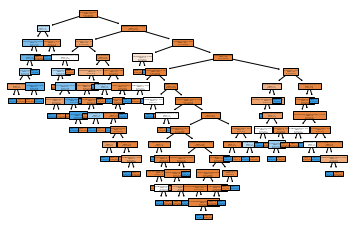

In [8]:
clf = tree.DecisionTreeClassifier() # went with default settings
clf = clf.fit(X_train, Y_train)

tree.plot_tree(clf, feature_names=features, class_names=['Bankrupt', 'Solvent'], impurity=False, filled=True);

In [9]:
Y_h = clf.predict(X_vlad) #decision tree where very inconsistent 


A = clf.score(X_vlad,Y_h)
F1 = f1_score(np.array(Y_vlad),Y_h)
AUC = roc_auc_score(Y_vlad,Y_h)
print(A)
print(F1)
print(AUC)



1.0
0.0
0.48343373493975905


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
R_clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
R_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=700, n_jobs=-1, oob_score=True,
                       random_state=1)

In [11]:
Y_R = R_clf.predict_proba(X_vlad)[:,1] # unlike decsion trees, they were more stable
Y_L = R_clf.predict(X_vlad)


A1 = R_clf.score(X_vlad,Y_L)
F = f1_score(Y_vlad,Y_L)
AUC_roc = roc_auc_score(Y_vlad,Y_R)
print(A1)
print(F)
print(AUC_roc)


1.0
0.0
0.9113119143239625


In [12]:
Test_predic = R_clf.predict_proba(T)[:,1]

In [13]:
T1 = pd.read_csv('/kaggle/input/cap-4611-spring-21-assignment-1/test.csv')
final_data = pd.DataFrame({'id':T1.id,'Bankrupt':Test_predic})
final_data.to_csv('Final_submit.csv',index=False)